# Lesson 7 Class Exercises: Matplotlib

With these class exercises we learn a few new things.  When new knowledge is introduced you'll see the icon shown on the right: 
<span style="float:right; margin-left:10px; clear:both;">![Task](../media/new_knowledge.png)</span>

## Get Started
Import the Numpy, Pandas, Matplotlib packages and the Jupyter notebook Matplotlib magic

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1. Load and clean the data for plotting

Import the Real Minimum Wages dataset from https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas_panel/realwage.csv

In [40]:
minwages = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-source-py/master/source/_static/lecture_specific/pandas_panel/realwage.csv')
print(minwages.shape)
minwages.head()

(1408, 6)


,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17132.443
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18100.918
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,17747.406
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18580.139
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,18755.832


Clean the data by performing the following:
1. Add a new column containing just the year
2. Drop rows with missing values
3. Keep only rows in the series "In 2015 constant prices at 2015 USD PPPs"
4. Keep only rows where the pay period is 'Annual'
5. Drop unwanted columns: 'Unnamed: 0', 'Time' and 'Series'
6. Rename the 'value' column as 'Salary'
7. Reset the indexes

In [41]:
minwages['Year'] = pd.to_datetime(minwages['Time']).dt.year
minwages.dropna(inplace=True)
minwages = minwages[minwages['Series'] == "In 2015 constant prices at 2015 USD PPPs"]
minwages = minwages[minwages['Pay period'] == "Annual"]
print(minwages.shape)
minwages.drop(['Unnamed: 0', 'Time', 'Series'], inplace=True, axis=1)
minwages.rename({'value' : 'Minimum_Salary'}, inplace=True, axis=1)
minwages.reset_index(drop=True, inplace=True)
minwages.head()

(335, 7)


,Country,Pay period,Minimum_Salary,Year
0,Ireland,Annual,17132.443,2006
1,Ireland,Annual,18100.918,2007
2,Ireland,Annual,17747.406,2008
3,Ireland,Annual,18580.139,2009
4,Ireland,Annual,18755.832,2010


## Exercise 2. Add a quartile group column

Find the quartile to which each row of the `Minimum_Salary` column belongs.  Use the [pd.DataFrame.quantile()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) function to to find the exact quartiles.  Add a new column to the dataframe named `Group` that contains the values `QG1`, `QG2`, `QG3` or `QG4` representeding the quartile group (QG) to which the row belongs. Rows with a value between 0 and the first quartile get the value QG1, rows between the 1st and 2nd quartile get the value QG2, etc.  The resulting table should look like the following:

| Country | Pay period | Minimum_Salary | Year | Group | 
| -- | -- | -- | -- | -- |
| Turkey | Annual | 9379.5137| 2014 | QG2 | 
| Israel | Annual | 11428.6940 | 2006 | QG2 | 
| Colombia | Annual | 6902.3120 | 2013 | QG1 | 
| Turkey | Annual | 8514.1846 | 2009 | QG2 | 
| Costa Rica | Annual | 10859.7470 | 2016 | QG2 | 

Step 1: Find the quartiles for teh `Minimum_Salary` column

In [42]:
q1 = minwages['Minimum_Salary'].quantile(q=0.25)
q2 = minwages['Minimum_Salary'].quantile(q=0.5)
q3 = minwages['Minimum_Salary'].quantile(q=0.75)
q4 = minwages['Minimum_Salary'].quantile(q=1)
print(q1, q2, q3, q4)

6952.0789 11442.349 16778.677 23401.492


Step 2: Create a new Series object of the correct size that will eventually house our Group categories.  

In [43]:
group = pd.Series(np.zeros(minwages.shape[0]))

Step 3: Set the quartile groups for series relative to what it should be in the rows of the dataframe, and then add that series to our dataframe.

In [44]:
group[(minwages['Minimum_Salary'] > 0) & (minwages['Minimum_Salary'] <= q1)] = 'QG1'
group[(minwages['Minimum_Salary'] > q1) & (minwages['Minimum_Salary'] <= q2)] = 'QG2'
group[(minwages['Minimum_Salary'] > q2) & (minwages['Minimum_Salary'] <= q3)] = 'QG3'
group[(minwages['Minimum_Salary'] > q3) & (minwages['Minimum_Salary'] <= q4)] = 'QG4'
group.unique()
minwages['Group'] = group
minwages.sample(5)

,Country,Pay period,Minimum_Salary,Year,Group
58,New Zealand,Annual,17592.4960,2009,QG4
135,United States,Annual,15756.4230,2009,QG3
253,Israel,Annual,11428.6940,2006,QG2
323,Colombia,Annual,6267.9331,2008,QG1
310,Latvia,Annual,3216.4021,2006,QG1


## Exercise 3. Create a boxplot

Create a graph using a single axis that shows the boxplots of the four groups. You can use the [matplotlib.axes.Axes.boxplot()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html) function to do this.  This will allow us to see if we properly separated rows by quartiles. It will also allow us to see the spread of the data in each quartile. Be sure to lable the x-axis tick marks with the proper quantile group name.

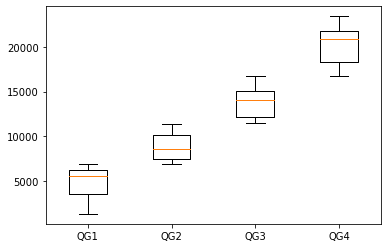

In [45]:
group1 = minwages[(minwages['Group'] == "QG1")]
group2 = minwages[(minwages['Group'] == "QG2")]
group3 = minwages[(minwages['Group'] == "QG3")]
group4 = minwages[(minwages['Group'] == "QG4")]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot = ax.boxplot([group1['Minimum_Salary'], group2['Minimum_Salary'], 
                   group3['Minimum_Salary'], group4['Minimum_Salary']], 
                  labels=['QG1', 'QG2','QG3', 'QG4'])

## Exercise 4. Create a Scatterplot

Create a single scatterplot to explore if the salaries in quartile group 1 and quartile group 4 are correlated.

Step 1: Transform the data such that each quantile group is a separate column with an index of `Year`.

                Country Pay period  Minimum_Salary  Year Group
77               Mexico     Annual       1797.1790  2006   QG1
78               Mexico     Annual       1795.8420  2007   QG1
79               Mexico     Annual       1776.7910  2008   QG1
80               Mexico     Annual       1765.4010  2009   QG1
81               Mexico     Annual       1777.1610  2010   QG1
82               Mexico     Annual       1789.1700  2011   QG1
83               Mexico     Annual       1791.9680  2012   QG1
84               Mexico     Annual       1799.7770  2013   QG1
85               Mexico     Annual       1797.6790  2014   QG1
86               Mexico     Annual       1834.1930  2015   QG1
87               Mexico     Annual       1895.6530  2016   QG1
99      Slovak Republic     Annual       6210.7881  2006   QG1
100     Slovak Republic     Annual       6599.4609  2007   QG1
101     Slovak Republic     Annual       6615.6250  2008   QG1
165             Estonia     Annual       5179.6499  200

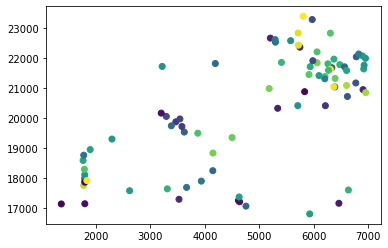

In [38]:
qgroup_minwages = minwages.pivot_table(values = 'Minimum_Salary', columns='Group', index='Year', aggfunc='mean')
qgroup_minwages

group1 = minwages[(minwages['Group'] == "QG1")]
group2 = minwages[(minwages['Group'] == "QG2")]
group3 = minwages[(minwages['Group'] == "QG3")]
group4 = minwages[(minwages['Group'] == "QG4")]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot = ax.scatter(group1['Minimum_Salary'], group4['Minimum_Salary'], c=np.random.random(84))
#group1["color"]=group1["Year"].replace({"199":"r","virginica":"b","versicolor":"g"})
color=np.arange(0,101,10)
group5=group1.groupby("Year")
print(group5.head())
#for x in group[1]:
#    for y in color:
#        x["color"]=y
    

Step 2: Now generate the plot

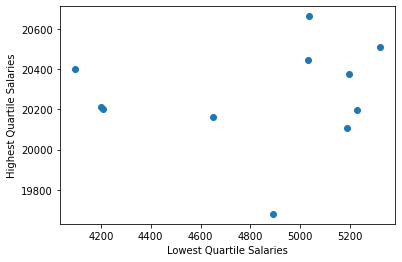

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.axes.set_xlabel('Lowest Quartile Salaries')
ax.axes.set_ylabel('Highest Quartile Salaries')
ax.scatter(qgroup_minwages['QG1'], qgroup_minwages['QG4'])
plt.show()

In [10]:
qgroup_minwages['QG1']

Year
2006    4208.389667
2007    4651.623600
2008    4892.017878
2009    5226.910111
2010    5189.651400
2011    5194.391911
2012    5032.832400
2013    5319.388475
2014    5034.365967
2015    4097.168500
2016    4199.648000
Name: QG1, dtype: float64

Recreate the plot above, but set a different color per year and size the points to be larger for later years and smaller for earlier years.

Step 1:  Create Numpy arrays to represent the colors and sizes for each point of data. 

In [15]:
colors = np.arange(10, 120, 10)
sizes = np.arange(10, 120, 10)
colors

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])

Step 2: Create the figure

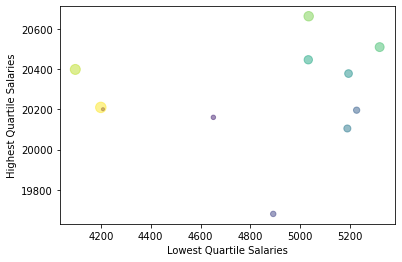

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.axes.set_xlabel('Lowest Quartile Salaries')
ax.axes.set_ylabel('Highest Quartile Salaries')
ax.scatter(qgroup_minwages['QG1'], qgroup_minwages['QG4'], c=colors, s=sizes, alpha=0.50)
plt.show()

## Exercise 5. Create a grid of scatterplots

Now, let's see the pairwise scatterplot of each quartile group with every other group.  Create a 4x4 grid of subplots. The rows and columns of the subplot represent one of the 4 groups and each plot represents the scatterplot of those groups.  The plot should look similar to the following:

<img src="../media/D08-multiplot.png" width="75%">


To ensure that the plot is not too small to read we can force a larger size of 15 inches by 15 inches with the following:

```python
plt.rcParams["figure.figsize"] = (15, 15)
```

Also, the x-axis and y-axis labels do not need to be repeated, we only need to set them on the first column and last rows.  You can set the y-axis labels on the first column by using the `set` function of the Axes function and providing the `ylabel` argument. For example.
```python
axes[0, 0].set(ylabel="QG1")
```

You can do the same for the x-axis on the bottom row using the same style:
```python
axes[3, 0].set(xlabel="QG1")
```

**Hint**: You will need to repeat a lot of code.  Cut-and-paste is your friend!  

Step 1: Create the figure with 4 x 4 set of axes.

IndexError: arrays used as indices must be of integer (or boolean) type

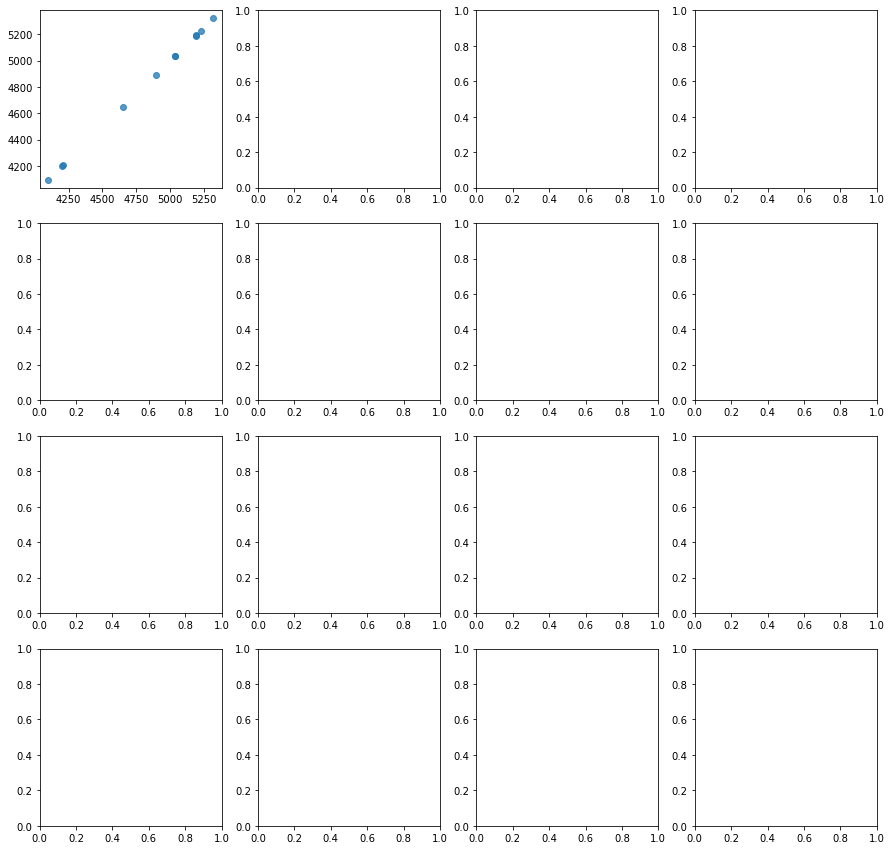

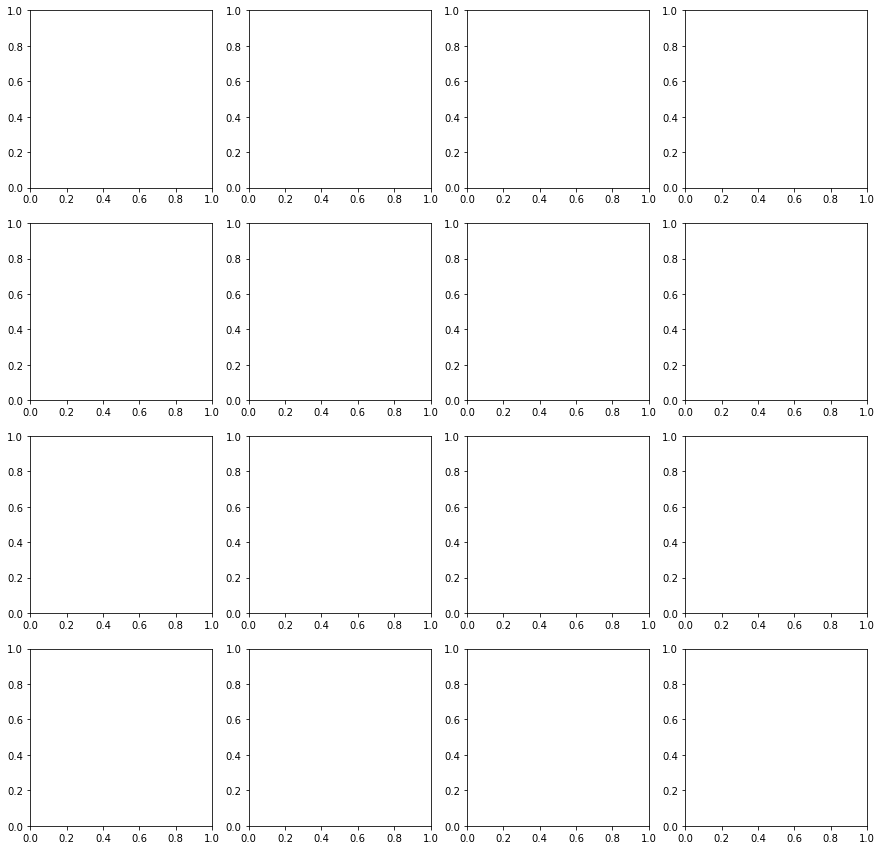

In [60]:
# Create the figure and 4 x 4 set of axes.
fig=plt.figure()
ax= fig.subplots(4,4)
plt.rcParams["figure.figsize"] = (15, 15)
fig = plt.figure()
axes = fig.subplots(4, 4)
ax[0, 0].scatter(qgroup_minwages['QG1'], qgroup_minwages['QG1'], alpha=0.75)
# Add the first row of scatterplots
for x in axes:
    for y in qgroup_minwages:
        axes[x].scatter(y,y)

axes[0, 0].scatter(qgroup_minwages['QG1'], qgroup_minwages['QG1'], c=np.random.random(11),alpha=0.75)
axes[0, 1].scatter(qgroup_minwages['QG2'], qgroup_minwages['QG2'], c=np.random.random(11),alpha=0.75)
axes[0, 2].scatter(qgroup_minwages['QG3'], qgroup_minwages['QG3'], c=np.random.random(11),alpha=0.75)
axes[0, 3].scatter(qgroup_minwages['QG4'], qgroup_minwages['QG4'], c=np.random.random(11),alpha=0.75)

# Add the second row of scatterplots
axes[1, 0].scatter(qgroup_minwages['QG1'], qgroup_minwages['QG2'], c=colors, s=sizes, alpha=0.75)
axes[1, 1].scatter(qgroup_minwages['QG2'], qgroup_minwages['QG2'], c=colors, s=sizes, alpha=0.75)
axes[1, 2].scatter(qgroup_minwages['QG3'], qgroup_minwages['QG2'], c=colors, s=sizes, alpha=0.75)
axes[1, 3].scatter(qgroup_minwages['QG4'], qgroup_minwages['QG2'], c=colors, s=sizes, alpha=0.75)

# Add the third row of scatterplots
axes[2, 0].scatter(qgroup_minwages['QG1'], qgroup_minwages['QG3'], c=colors, s=sizes, alpha=0.75)
axes[2, 1].scatter(qgroup_minwages['QG2'], qgroup_minwages['QG3'], c=colors, s=sizes, alpha=0.75)
axes[2, 2].scatter(qgroup_minwages['QG3'], qgroup_minwages['QG3'], c=colors, s=sizes, alpha=0.75)
axes[2, 3].scatter(qgroup_minwages['QG4'], qgroup_minwages['QG3'], c=colors, s=sizes, alpha=0.75)

# Add the fourth row of scatterplots
axes[3, 0].scatter(qgroup_minwages['QG1'], qgroup_minwages['QG4'], c=colors, s=sizes, alpha=0.75)
axes[3, 1].scatter(qgroup_minwages['QG2'], qgroup_minwages['QG4'], c=colors, s=sizes, alpha=0.75)
axes[3, 2].scatter(qgroup_minwages['QG3'], qgroup_minwages['QG4'], c=colors, s=sizes, alpha=0.75)
axes[3, 3].scatter(qgroup_minwages['QG4'], qgroup_minwages['QG4'], c=colors, s=sizes, alpha=0.75)

# Set the x-axis lables only on the left-most plots
axes[3, 0].set(xlabel="QG1")
axes[3, 1].set(xlabel="QG2")
axes[3, 2].set(xlabel="QG3")
axes[3, 3].set(xlabel="QG4")

# Set the y-axis labels only on the bottom plots.
axes[0, 0].set(ylabel="QG1")
axes[1, 0].set(ylabel="QG2")
axes[2, 0].set(ylabel="QG3")
axes[3, 0].set(ylabel="QG4")

# Show the plot
plt.show()

## Exercise 6. Create a grid of line plots

Now, let's create a line graph of changes over time for each quartile group.  Let's use a 2x2 subplot grid with each grid showing a different group. It should look like the following

<img src="../media/D08-lineplot.png" width="50%">

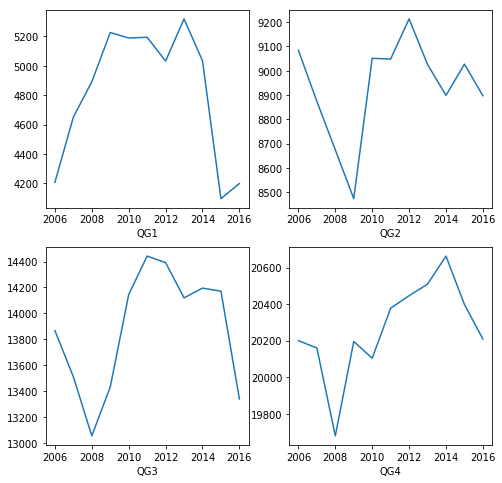

In [37]:
plt.rcParams["figure.figsize"] = (8, 8)
fig = plt.figure()
axes = fig.subplots(2, 2)
axes[0, 0].plot(qgroup_minwages['QG1'])
axes[0, 1].plot(qgroup_minwages['QG2'])
axes[1, 0].plot(qgroup_minwages['QG3'])
axes[1, 1].plot(qgroup_minwages['QG4'])

axes[0, 0].set(xlabel = 'QG1')
axes[0, 1].set(xlabel = 'QG2')
axes[1, 0].set(xlabel = 'QG3')
axes[1, 1].set(xlabel = 'QG4')
plt.show()